In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV


# Part 1: Loading the Diabetes Data

### 1. Load the Nutrient Values data from the link in the pdf.

Starting Thoughts:

    We have a supervised learning problem
    
    We will start with a base model to have a starting point from there
    
    Since we have 60ish features we can run some dimensionality reduction to improve our base model



In [176]:
df = pd.read_excel('Nutrient_Values.xlsx',header=1)

In [177]:
df.head(100)

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.000,0.026,0.000,0.000,0.00,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,...,0.002,0.000,0.069,0.007,0.000,0.003,0.000,0.001,0.00,89.04
2,11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,...,0.004,0.000,0.115,0.012,0.000,0.004,0.001,0.002,0.00,88.10
3,11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,...,0.000,0.000,0.078,0.050,0.000,0.000,0.000,0.000,0.00,88.20
4,11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,...,0.004,0.000,0.115,0.012,0.000,0.004,0.001,0.002,0.00,88.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11480030,"Yogurt, whole milk, baby food, with fruit and ...",9010,Baby food: yogurt,92,3.05,13.00,11.46,0.6,3.08,...,0.001,0.000,0.146,0.259,0.000,0.000,0.000,0.000,0.00,80.21
96,11480040,"Yogurt, whole milk, baby food, with fruit and ...",9010,Baby food: yogurt,98,3.40,13.22,11.46,0.3,3.53,...,0.023,0.021,0.147,0.117,0.011,0.007,0.038,0.007,0.04,79.16
97,11511000,"Chocolate milk, NFS",1208,"Flavored milk, nonfat",67,3.39,13.46,8.39,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,82.34
98,11511100,"Chocolate milk, ready to drink, whole",1202,"Flavored milk, whole",83,3.17,10.34,9.54,0.8,3.39,...,0.000,0.000,0.078,0.046,0.000,0.000,0.000,0.000,0.00,82.30


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Food code                               7083 non-null   int64  
 1   Main food description                   7083 non-null   object 
 2   WWEIA Category number                   7083 non-null   int64  
 3   WWEIA Category description              7083 non-null   object 
 4   Energy (kcal)                           7083 non-null   int64  
 5   Protein (g)                             7083 non-null   float64
 6   Carbohydrate (g)                        7083 non-null   float64
 7   Sugars, total
(g)                       7083 non-null   float64
 8   Fiber, total dietary (g)                7083 non-null   float64
 9   Total Fat (g)                           7083 non-null   float64
 10  Fatty acids, total saturated (g)        7083 non-null   floa



We need to figure out how to use this table we got, so let's look at what features it has.

Looks like
        0 Null in DataFrame
        
        69 colums
        
        4 categorical features
        
        65 numerical features
        
        1 target
        
        7083 Rows
        
        train: 5666 rows
        
        test: 1417 rows



# Part 2: Getting data ready for model

### 1. Get raw_x and raw_y into simple variables
### 2. Train test split
### 3. Standardizing data 


In [179]:
df.columns

Index(['Food code', 'Main food description', 'WWEIA Category number',
       'WWEIA Category description', 'Energy (kcal)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars, total\n(g)', 'Fiber, total dietary (g)',
       'Total Fat (g)', 'Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)',
       'Retinol (mcg)', 'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)',
       'Carotene, beta (mcg)', 'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)',
       'Lutein + zeaxanthin (mcg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)',
       'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)',
       'Choline, total (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin B-12, added\n(mcg)', 'Vitamin C (mg)',
       'Vitamin D (D2 + D3) (mcg)', 'Vitamin E (alpha-tocopherol) (mg)',
       'Vitamin E, added\n(mg)', 'Vitamin K (phylloquinone) (

In [180]:
X_raw = df[['Energy (kcal)', 'Protein (g)',
       'Carbohydrate (g)', 'Fiber, total dietary (g)', 'Total Fat (g)',
       'Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)',
       'Retinol (mcg)', 'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)',
       'Carotene, beta (mcg)', 'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)',
       'Lutein + zeaxanthin (mcg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)',
       'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)',
       'Choline, total (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin B-12, added\n(mcg)', 'Vitamin C (mg)',
       'Vitamin D (D2 + D3) (mcg)', 'Vitamin E (alpha-tocopherol) (mg)',
       'Vitamin E, added\n(mg)', 'Vitamin K (phylloquinone) (mcg)',
       'Calcium (mg)', 'Phosphorus (mg)', 'Magnesium (mg)', 'Iron\n(mg)',
       'Zinc\n(mg)', 'Copper (mg)', 'Selenium (mcg)', 'Potassium (mg)',
       'Sodium (mg)', 'Caffeine (mg)', 'Theobromine (mg)', 'Alcohol (g)',
       '4:0\n(g)', '6:0\n(g)', '8:0\n(g)', '10:0\n(g)', '12:0\n(g)',
       '14:0\n(g)', '16:0\n(g)', '18:0\n(g)', '16:1\n(g)', '18:1\n(g)',
       '20:1\n(g)', '22:1\n(g)', '18:2\n(g)', '18:3\n(g)', '18:4\n(g)',
       '20:4\n(g)', '20:5 n-3\n(g)', '22:5 n-3\n(g)', '22:6 n-3\n(g)',
       'Water\n(g)']]
Y_raw = df['Sugars, total\n(g)']


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=122, shuffle=True)


scaler = StandardScaler() # scaling is best for dimentionality reduction later
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Part 3: Base Model

### Linear Regression and evaluating model performace

Both MAE and RMSE are in the same units as the dependent variable which is more desirable in our case for evaluating our model since we want to put points on to our food items. If we are going to use a range of sugar for our point sysem we will probably want our evaluation metric to be the same units as our ranges. As compared to MAE, RMSE will give higher weight to the errors and punish large errors in the model, and we want to punish those more becuase we don't want one of items to be really wrong for someone watching thier sugar. RMSE is the default metric of many models as the loss function defined in terms of RMSE is smoothly differentiable and makes it easier to perform mathematical operations too.



In [183]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)


y_pred = lr.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred, squared=False) # false means RMSE
print('R2 of base model',test_score)
print("RMSE of base model",rmse_test)


R2 of base model 0.6308432253399041
RMSE of base model 7.582896434691071


In [185]:
ridge_alphas = np.logspace(-2, 4, num=250)
ridge_models = []

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_models.append(ridge)

In [186]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_raw.columns))),
                     index=ridge_alphas, columns=X_raw.columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

Text(0, 0.5, 'Standardized Coefficient')

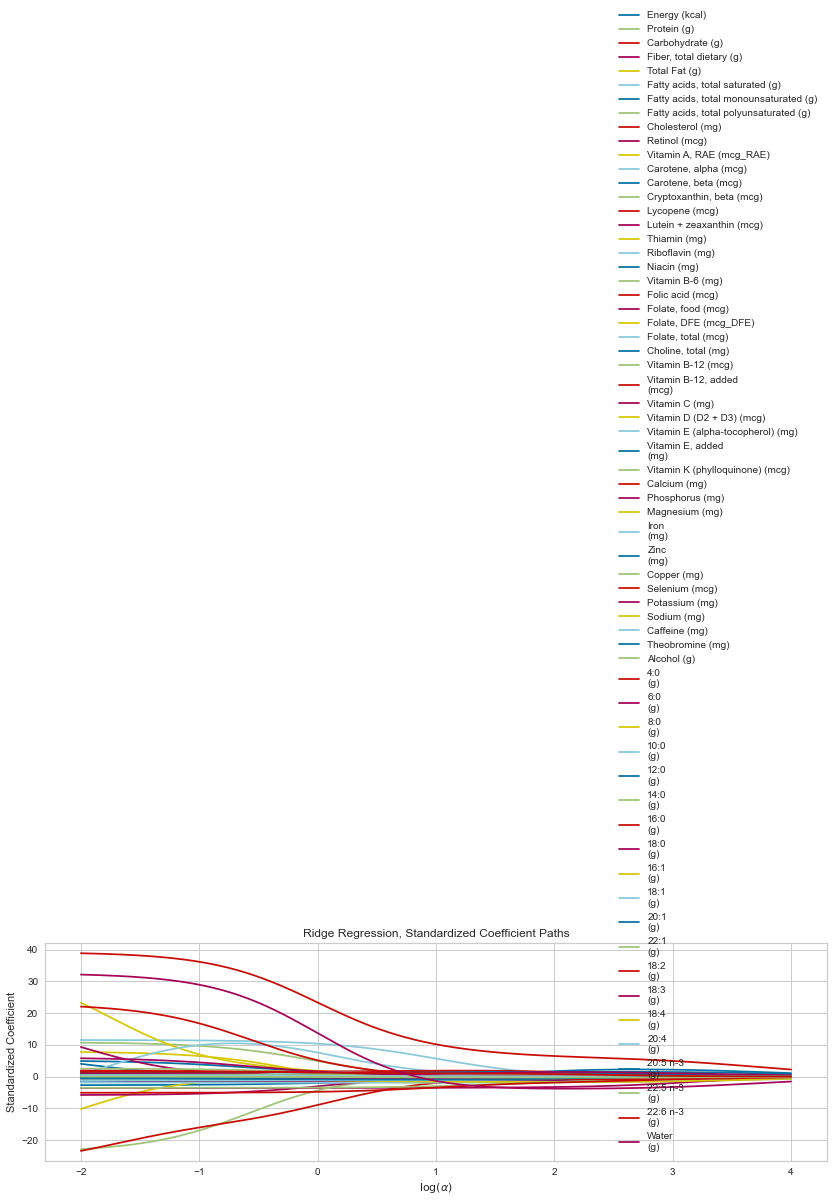

In [187]:
fig, ax = plt.subplots(figsize=(14, 4))

for column in X_raw.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
#ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")

### I am next going to compute the value of alpha that leads to the minimum CV test error, based on the above graph it looks like it would be around 1-3. Lets test that hypo


In [188]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,2,3,4,5,10,200,300,400,500,550,600,700,750,800,850,899],store_cv_values=True,alpha_per_target=True).fit(X_train, y_train)
clf_test_score = clf.score(X_train, y_train)

clf_y_pred = clf.predict(X_test)
clf_rmse_test = mean_squared_error(y_test, clf_y_pred, squared=False) # false means RMSE
print('R2 of RidgeCV model',clf_test_score)
print("RMSE of RidgeCV model",clf_rmse_test)

R2 of RidgeCV model 0.6096508969558434
RMSE of RidgeCV model 7.650126039695401


In [155]:
clf.alpha_  

800.0

### The optimum is 800 looking at the graph above the log of 800 is around 3 so it would fall around that level on the graph. Slightly better results than base model

### Next lets test Lasso and ElasticNet

In [189]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, random_state=0,max_iter=700000).fit(X_train, y_train)

#reg.predict(X_test[:1,])
print(reg.alpha_)

lasso_test_score = reg.score(X_test,y_test)
lasso_y_pred = reg.predict(X_test)
lasso_rmse_test = mean_squared_error(y_test, lasso_y_pred, squared=False) # false means RMSE
print('R2 of LassoCV model',lasso_test_score)
print("RMSE of LassoCV model",lasso_rmse_test)

0.2894006568120946
R2 of LassoCV model 0.6165672263610653
RMSE of LassoCV model 7.728128214203861


In [191]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, y_train)

ENCV_test_score = regr.score(X_test,y_test)
ENCV_y_pred = regr.predict(X_test)
ENCV_rmse_test = mean_squared_error(y_test, ENCV_y_pred, squared=False) # false means RMSE
print('R2 of ENCV model',ENCV_test_score)
print("RMSE of ENCV model",ENCV_rmse_test)

print('ENCV alpha',regr.alpha_)
print('ENCV L1 norm vs L2 norm ratio',regr.l1_ratio_)

R2 of ENCV model 0.6244069558860335
RMSE of ENCV model 7.648714903442107
ENCV alpha 0.1767575580131248
ENCV L1 norm vs L2 norm ratio 0.5


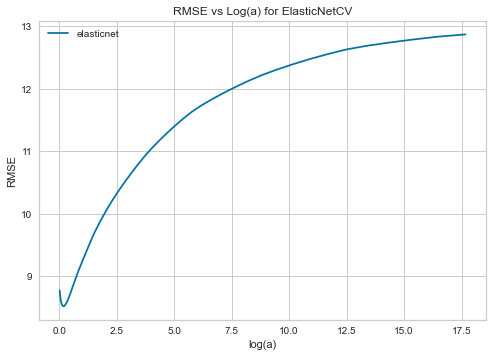

In [173]:

g = plt.plot(regr.alphas_, np.sqrt(regr.mse_path_.mean(1)), label="elasticnet")
plt.ylabel("RMSE")
plt.xlabel("log(a)")
plt.title("RMSE vs Log(a) for ElasticNetCV")
plt.legend();


# Part 4: Final Results


### Results

    R2 of base model 0.6308432253399041
    RMSE of base model 7.582896434691071
    
    R2 of RidgeCV model 0.6096508969558434 #best result alpha 800
    RMSE of RidgeCV model 7.582896434691071
    
    R2 of LassoCV model 0.6165672263610653
    RMSE of LassoCV model 7.728128214203861
    
    R2 of LassoCV model 0.6244069558860335
    RMSE of LassoCV model 7.648714903442107
    
    
Lasso is normally better because Ridge is re-scaling of OLS while Lasso is feature selection included.

In this quick assignment it looks like Ridge works best but only by a little.

    
    
    
    

    